In [1]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
p_cr = 35 # критическая стоимость продукта
tau1 = 16 # длительность производственного цикла фирмы 1
p1 = 9.9 # себестоимость продукта у фирмы 1
tau2 = 20 # длительность производственного цикла фирмы 2
p2 = 8.5 # себестоимость продукта у фирмы 2
N = 30 # число потребителей производимого продукта
q = 1 # максимальная потребность одного человека в продукте в единицу времени

In [3]:
a1 = p_cr/(tau1*tau1*p1*p1*N*q)
a2 = p_cr/(tau2*tau2*p2*p2*N*q)

b = p_cr/(tau1*tau1*tau2*tau2*p1*p1*p2*p2*N*q)

c1 = (p_cr-p1)/(tau1*p1)
c2 = (p_cr-p2)/(tau2*p2)

In [4]:
# Стационарные точки

m1 = (a2*c1-b*c2)/(a1*a2-b*b)
m2 = (a1*c2-b*c1)/(a1*a2-b*b)

In [5]:
# Первый случай

def syst(x, t):
    dx1 = x[0] - (a1/c1)*x[0]*x[0] - (b/c1)*x[0]*x[1]
    dx2 = (c2/c1)*x[1] - (a2/c1)*x[1]*x[1] - (b/c1)*x[0]*x[1]
    return dx1, dx2

In [6]:
# Второй случай

def syst2(x, t):
    dx1 = x[0] - (b/c1 + 0.00065)*x[0]*x[1] - (a1/c1)*x[0]*x[0]
    dx2 = (c2/c1)*x[1] - (b/c1)*x[0]*x[1] - (a2/c1)*x[1]*x[1]
    return dx1, dx2

In [10]:
t = np.arange(0, 15, 0.01)

# Начальное значение объема оборотных средств x1 и х2
x0=[6.5, 5.5]

# Решение дифф. уравнений
y = odeint(syst, x0, t)
y2 = odeint(syst2, x0, t)

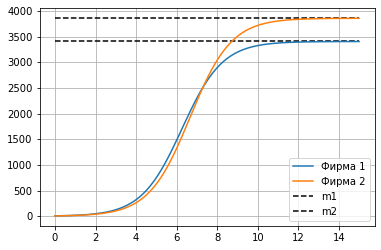

In [16]:
# Случай 1 + стац. точки

plt.plot(t, y[:,0], label='Фирма 1')
plt.plot(t, y[:,1], label='Фирма 2')
plt.hlines(m1, 0, 15, linestyles='dashed', label='m1')
plt.hlines(m2, 0, 15, linestyles='dashed', label='m2')
plt.legend(loc=4)
plt.grid()

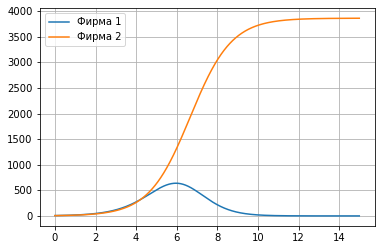

In [14]:
# Случай 2

plt.plot(t, y2[:,0], label='Фирма 1')
plt.plot(t, y2[:,1], label='Фирма 2')
plt.legend()
plt.grid()